<a href="https://colab.research.google.com/github/Ashrockzzz2003/DSA_NoteBooks/blob/main/Week_6/PDSA_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Union-Find Data Structure

## Kruskal's Algorithm [MCST]

- How can we keep track of components and merge them efficiently?
- We have a collection of disjoint sets - `Partitions`
- Need a data structure to maintain a collection of disjoint sets.
  - $MakeUnionFind(S)$ - set up initial singleton components {s} for each s 𝛜 S
  - $find(s)$ - return set containing $s$
  - $union(s)$ - merge sets of $s$ and $s'$.

## Approach_1

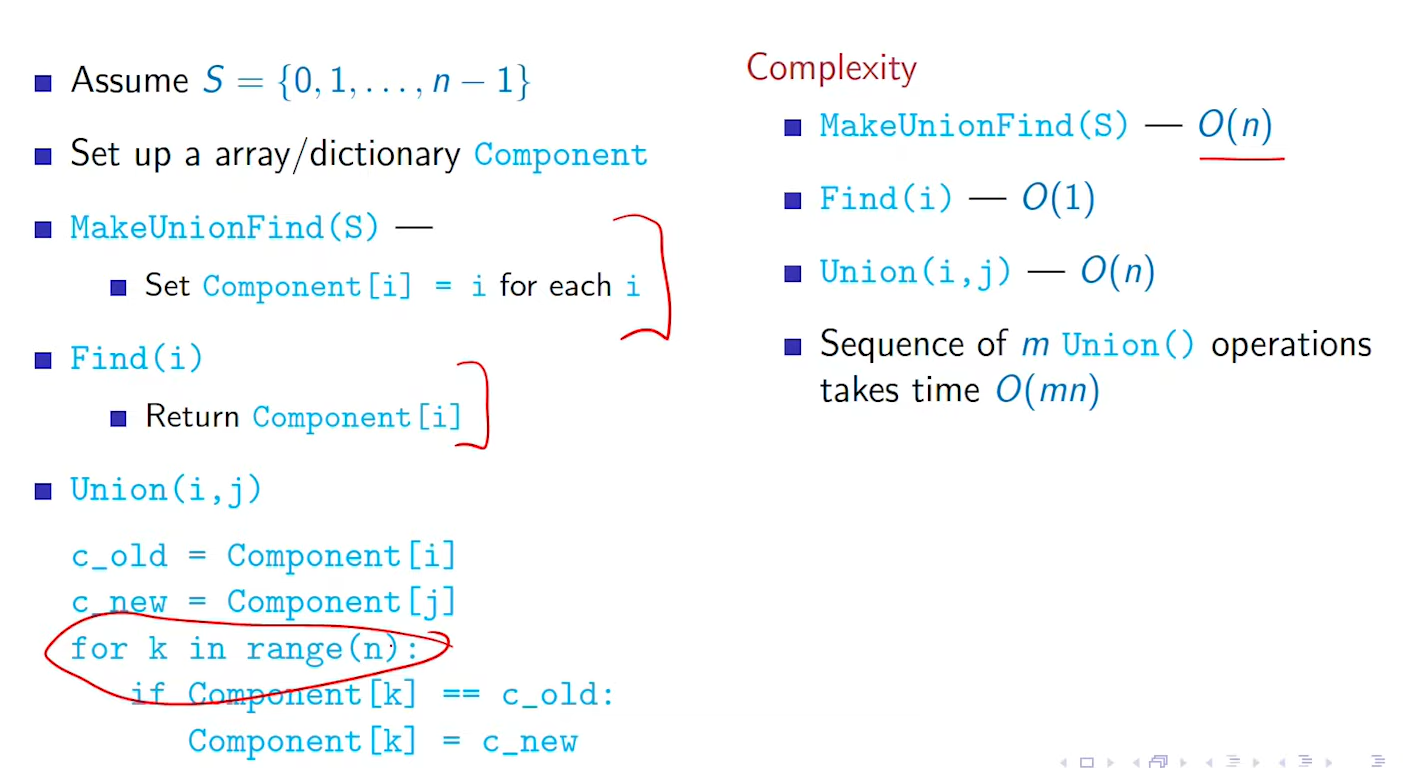

In [ ]:
class MakeUnionFind:
  def __init__(self):
    self.components = []
    self.size = 0
  def make_union_find(self, vertices):
    self.size = vertices
    for vertex in range(vertices):
      self.components[vertex] = vertex
  def find(self, vertex):
    return self.components[vertex]
  def union(self, u, v):
    old_c = self.components[u]
    new_c = self.components[v]
    for k in range(self.size):
      if self.components[k] == old_c:
        self.components[k] = new_c

## Complexity

- MakeUnionFind(S) - $O(n)$
- Find(i) - $O(1)$
- Union(i, j) - $O(n)$
- Sequence of m `Union()` operations takes $O(mn)$ time.

## Approach_2

- Another array/dictionary `Members`
- For each component $c$, $Members[c]$ is a list of its members.
- $Size[c] = len(Members[c])$ is the number of members

In [ ]:
class MakeUnionFind:
  def __init__(self):
    self.components = {}
    self.members = {}
    self.size = {}
  
  def make_union_find(self, vertices):
    for vertex in range(vertices):
      self.components[vertex] = vertex
      self.members[vertex] = [vertex]
      self.size[vertex] = 1
  
  def find(self, vertex):
    return self.components[vertex]
  
  def union(self, u, v):
    c_old = self.components[u]
    c_new = self.components[v]

    # Always add member in components that have greater size
    if self.size[c_new] >= self.size[c_old]:
      for x in self.members[c_old]:
        self.components[x] = c_old
        self.members[c_new].append(x)
        self.size[c_new] += 1
    else:
      for x in self.members[c_new]:
        self.components[x] = c_old
        self.members[c_old].append(x)
        self.size[c_old] += 1

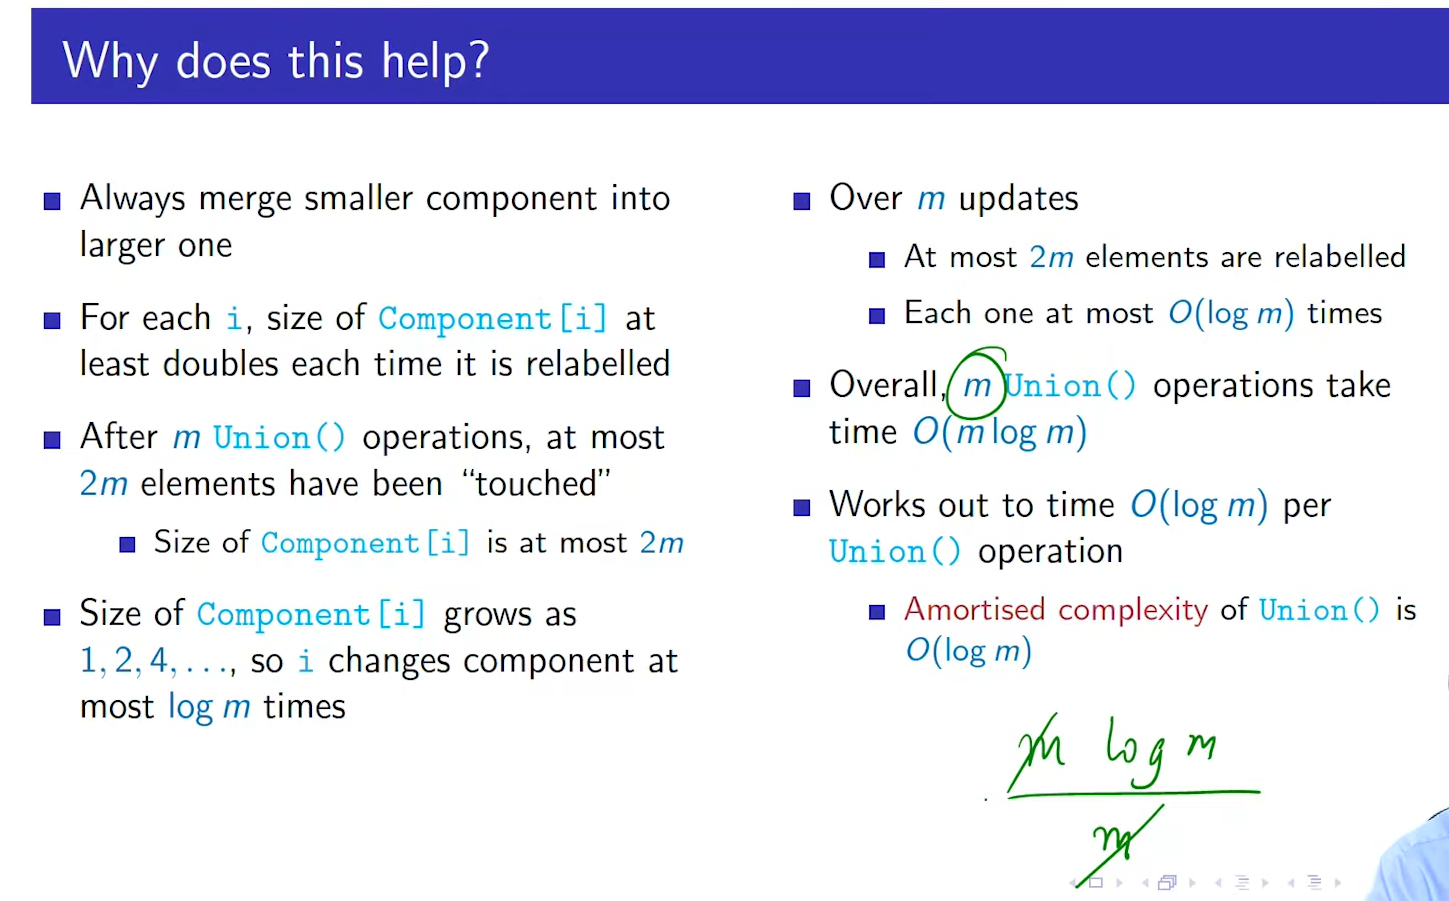

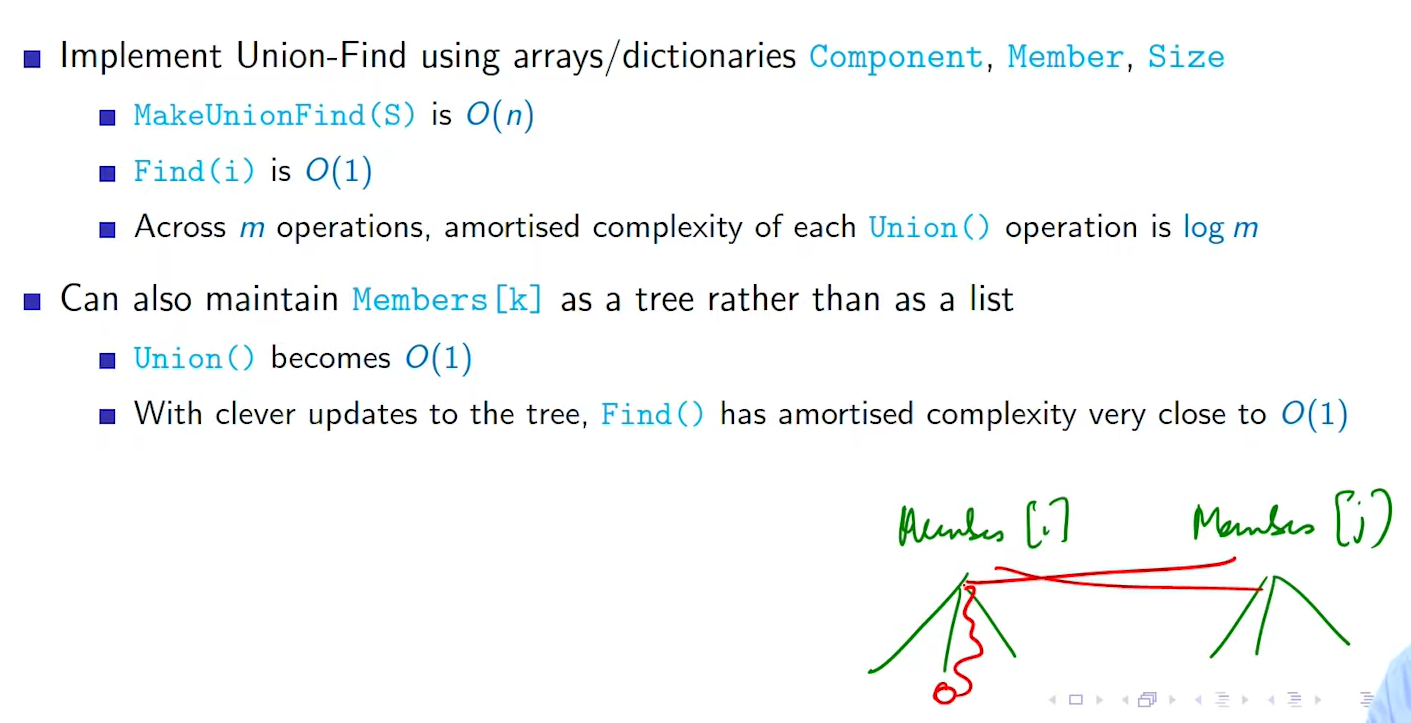

## Back to Kruskal's Algorithm

In [ ]:
def kruskal(WList):
  (edges, TE) = ([], [])
  for u in WList.keys():
    edges.extend([(d, u, v) for (v, d) in WList[u]])

  edges.sort()

  mf = MakeUnionFind()
  mf.make_union_find(len(WList))

  for (d, u, v) in edges:
    if mf.components[u] != mf.components[v]:
      mf.union(u, v)
      TE.append((u, v, d))

      # Stop when size == total number of vertices
      # Implies that a spanning tree is complete

      if mf.size[mf.components[u]] >= mf.size[mf.components[v]]:
        if mf.size[mf.components[u]] == len(WList):
          break
      else:
        if mf.size[mf.components[v]] == len(WList):
          break
  

  return TE

In [ ]:
edge = [(0,1,10),(0,2,18),(0,3,6),(0,4,20),(0,5,13),(1,2,10),(1,3,10),(1,4,5),(1,5,7),(2,3,2),(2,4,14),(2,5,15),(3,4,17),(3,5,12),(4,5,10)]

size = 6
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edge:
    WL[i].append((j,d))
print(kruskal(WL))

[(2, 3, 2), (1, 4, 5), (0, 3, 6), (1, 5, 7), (0, 1, 10), (1, 2, 10), (1, 3, 10)]


# Priority Queues

## Examples

- Job Scheduler
  - maintains a list of pending jobs with their priorities.
  - When the processor is free, scheduler picks out the job woth maximum priority in the list and schedules it.
  - How to maintain the list of pending jobs and their priorities.

## Abstract

- Need to maintain a collection of items with priorities to optimize the following operations.

- `delete_max`
  - identify and remove item with highest priority.
  - need not be unique.

- `insert`
  - add a new item to the collection

## Approach_1 [1D]

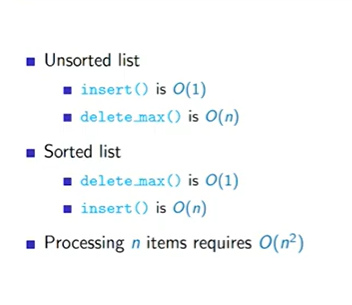

## Approach_2 [2D]

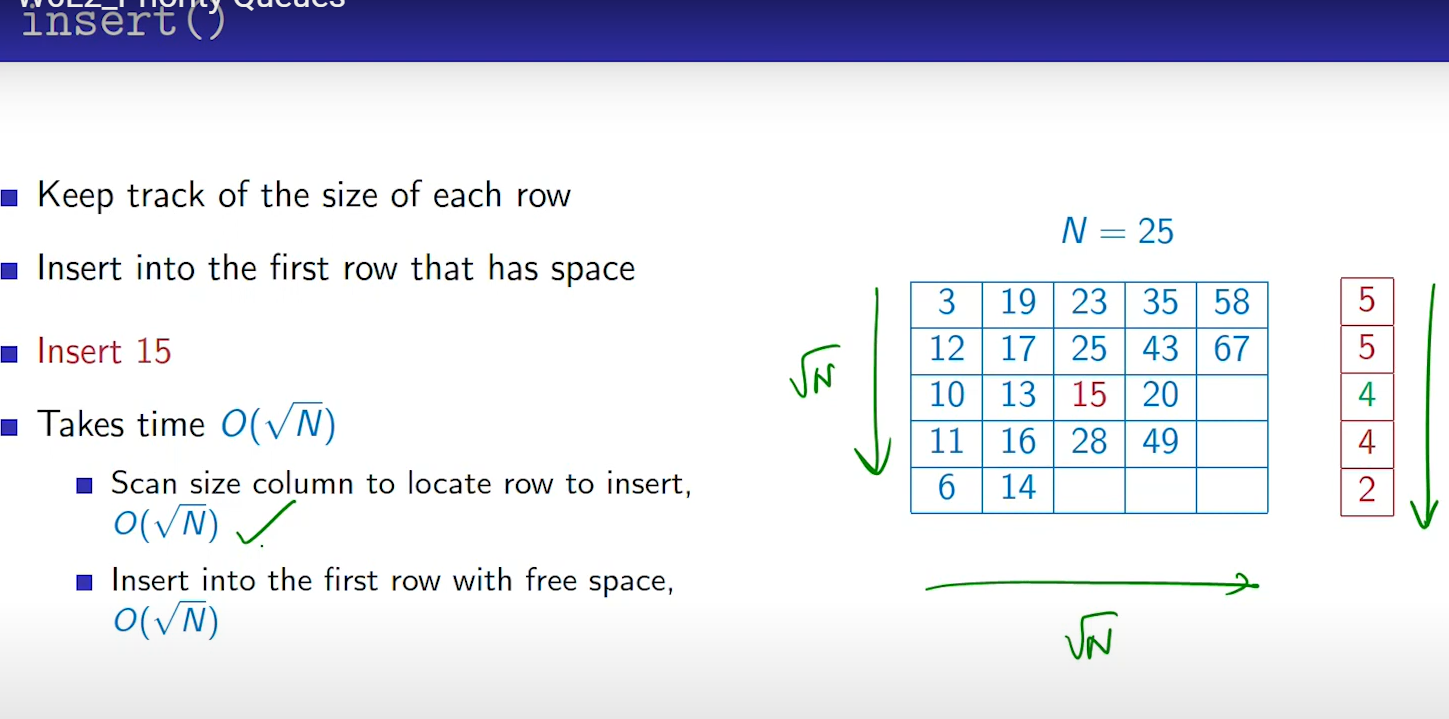

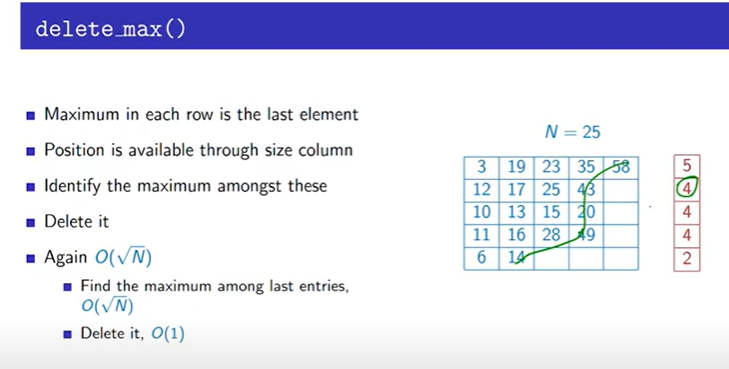

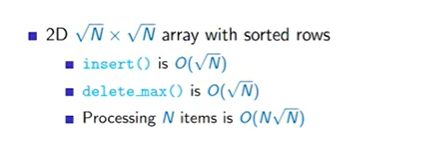

## More better approach?

- Maintain a special binary tree - `heap`
  - Height - $O(logn)$
  - `insert()` - $O(logn)$
  - `delete_max()` - $O(logn)$
  - Processing n jobs is $O(nlogn)$

# Heaps

## Binary Tree

A binary tree is a tree data structure in which each node can contain at most 2 children, which are referred to as the left child and the right child.

- `Leaf Node`
  - Node that has no children
- `Size`
  - Number of nodes
- `Height`
  - Number of levels

## Heap

Heap is a binary tree, filled level by level, left to right.

There are two types of the heap:

- `Max heap`
  - For each node V in heap except for leaf nodes, the value of V should be greater or equal to its child's node value.

- `Min Heap`
  - For each node V  in heap except for leaf nodes, the value of V should be less or equal to its child's node value.

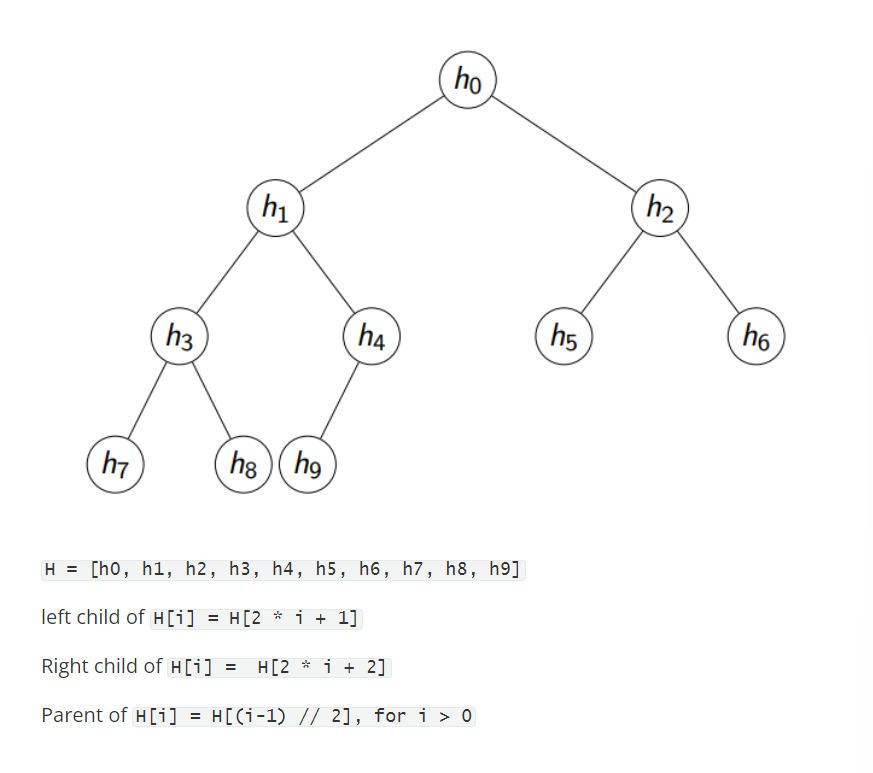

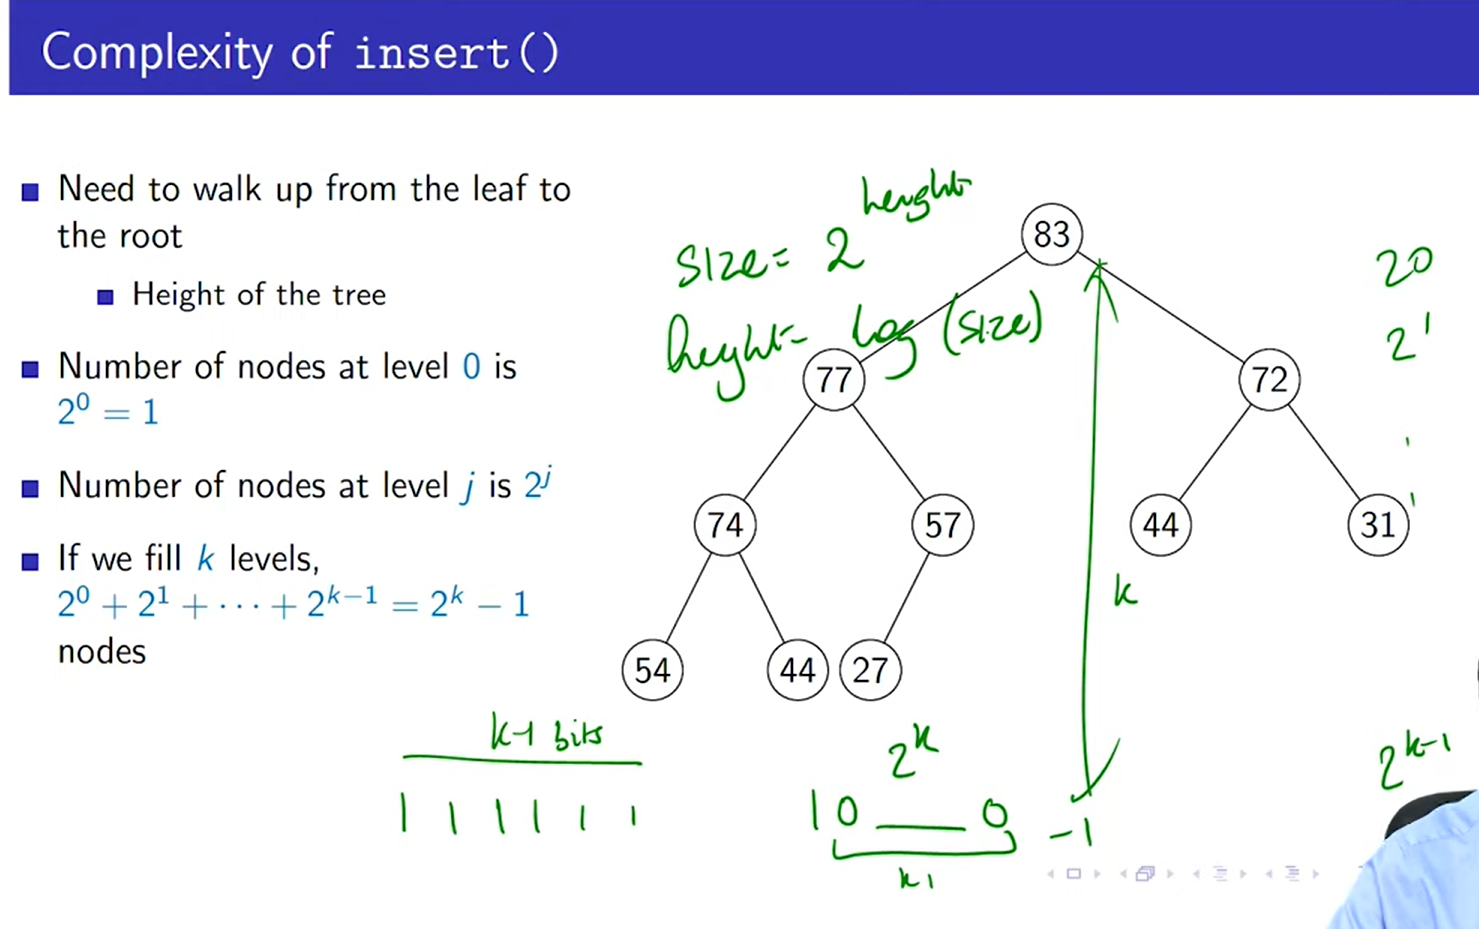

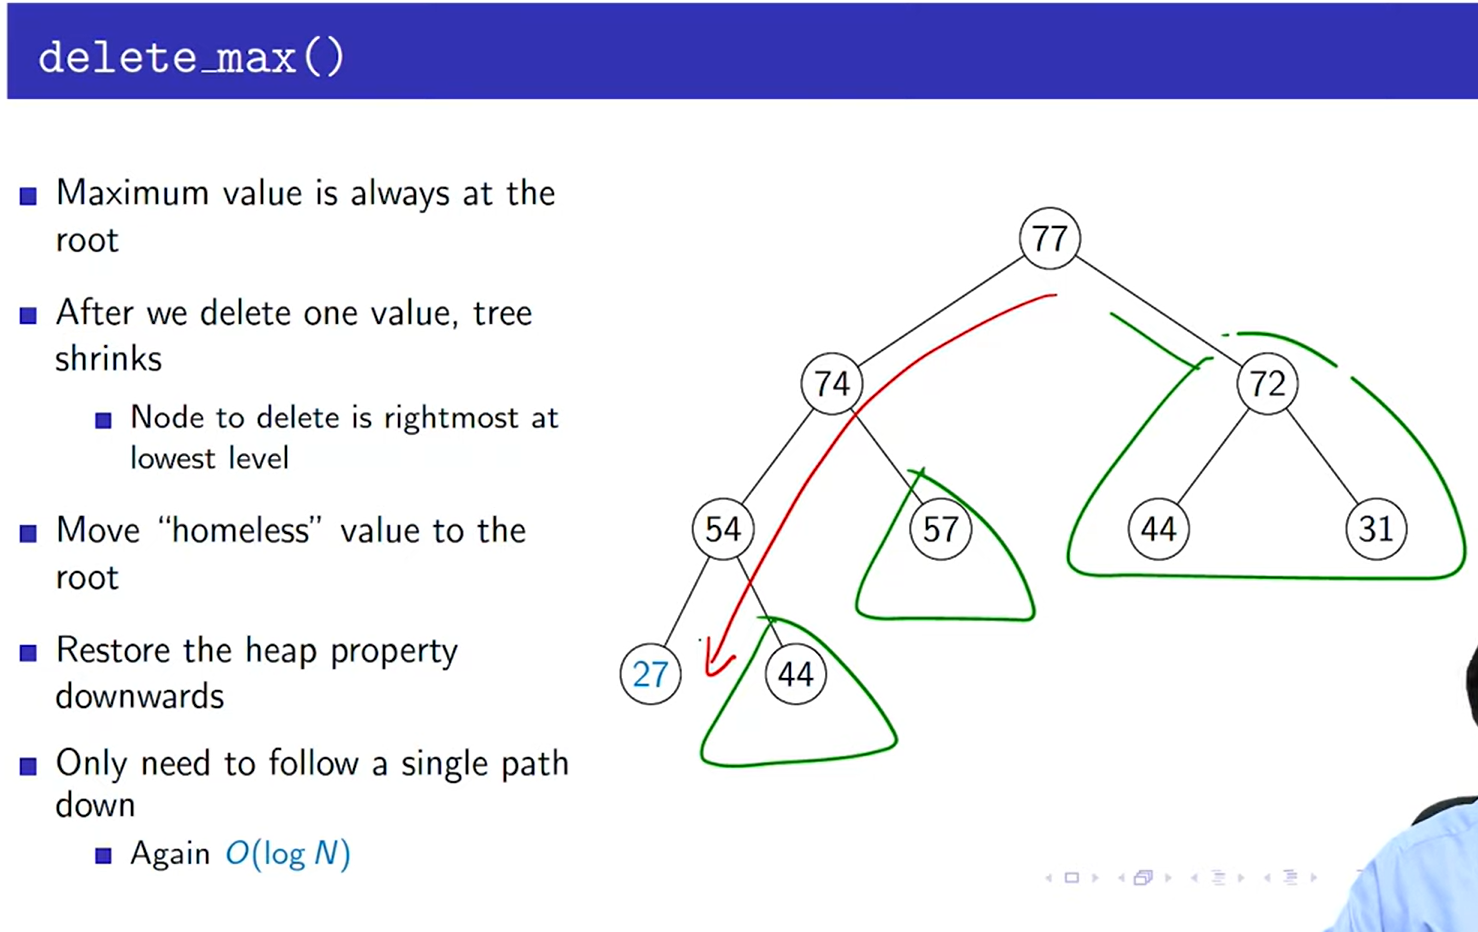

### Visualize heap

[Heap Visualization](https://visualgo.net/en/heap)

### Implement a Heap ADT

- Number the nodes from top to bottom left right
- Store as a list
- $H = [h0, h1, h2,....hn]$
- Children of $H[i]$ are at $H[2*i + 1], H[2*i+2]$
- Parent of $H[i]$ is at $H[(i-1)//2]$ for $i > 0$

#### Approach_1

- Start with an empty heap
- Repeatedly apply, $insert(vj)$
- Total time is $O(nlogn)$

#### Approach_2

- $mid = len(L) // 2$
- Slice $L[mid:]$ has only leaf nodes
  - Already satisfy heap condition
- Fix heap downwards for second last level.
- Repeat till you find the root!

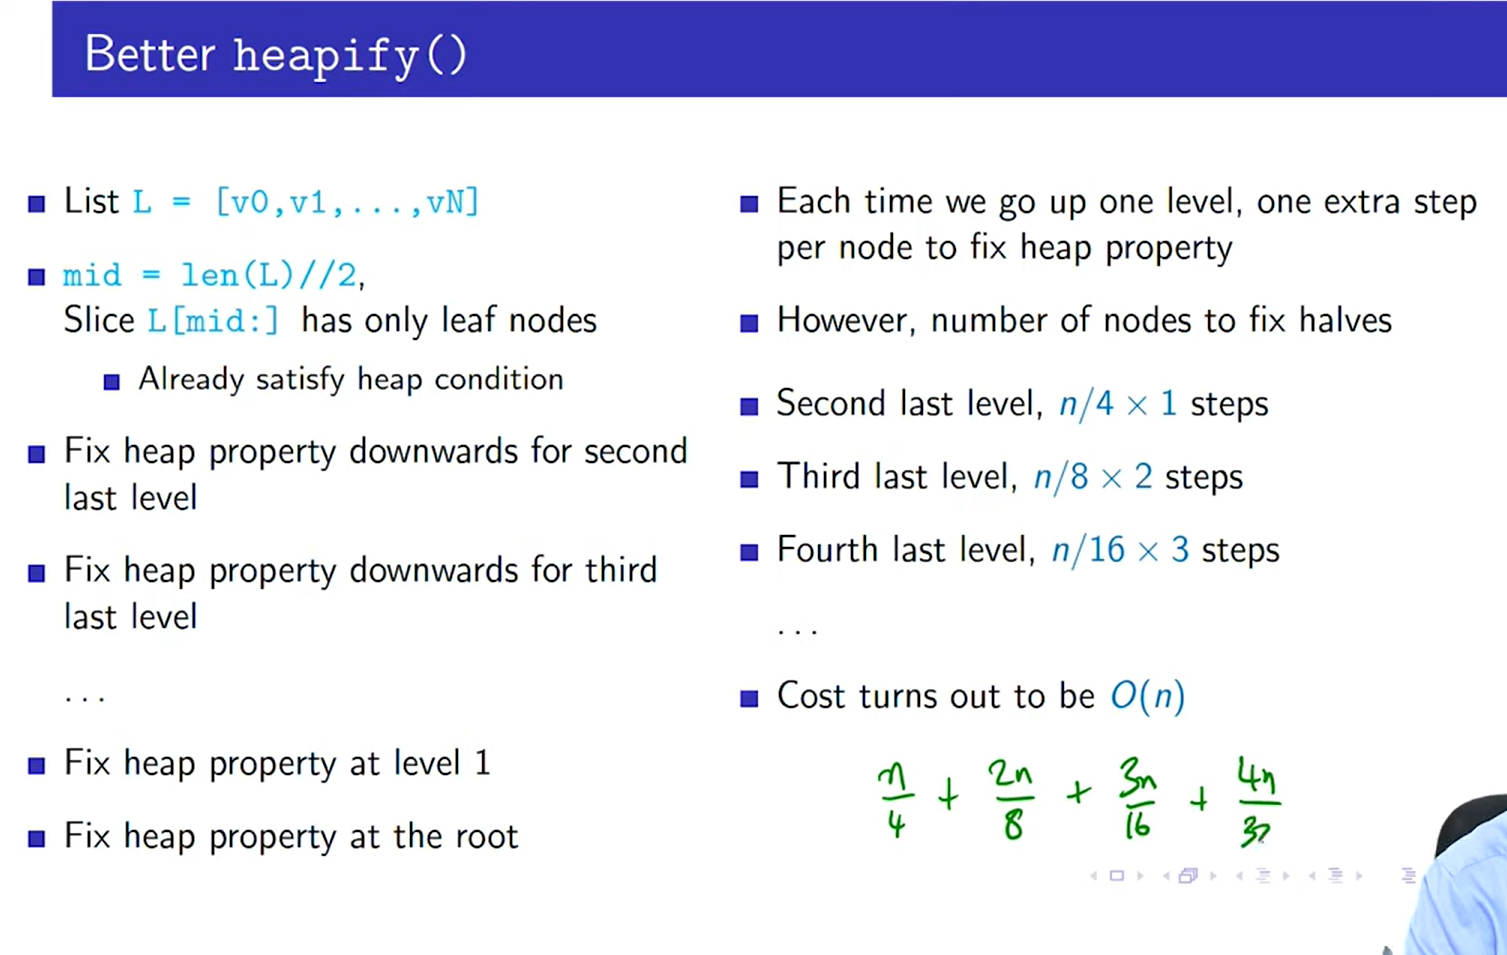

#### My Note

- Heaps are a tree implementation of a priority queue.

### Max Heap

In [2]:
class max_heap:
  # Initialize Heap
  def __init__(self):
    self.heap = []
  
  def max_heapify(self, k):
    l = 2*k + 1 # left child
    r = 2*k + 2 # right child

    largest = k

    if l < len(self.heap) and self.heap[l] > self.heap[largest]:
      largest = l
    if r < len(self.heap) and self.heap[r] > self.heap[largest]:
      largest = r
    if largest != k:
      self.heap[k], self.heap[largest] = self.heap[largest], self.heap[k]
      self.max_heapify(largest)
  
  def build_max_heap(self, L):
    self.heap = []
    for i in range(len(L)):
      self.heap.append(L[i])
    
    # MidPoint
    n = int((len(self.heap) // 2) - 1)

    for k in range(n, -1, -1):
      self.max_heapify(k)
  
  def insert_in_max_heap(self, v):
    self.heap.append(v)
    index = len(self.heap) - 1
    while index > 0:
      parent = (index - 1) // 2
      if self.heap[index] > self.heap[parent]:
        self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
        index = parent
      else:
        break
  
  def delete_max(self):
    item = None
    if self.heap != []:
      self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
      item = self.heap.pop()
      self.max_heapify(0)
    
    return item

In [8]:
heap = max_heap()
heap.build_max_heap([1,2,3,4,5,6])
print(heap.heap)
heap.insert_in_max_heap(7)
print(heap.heap)
heap.insert_in_max_heap(8)
print(heap.heap)
print(heap.delete_max())
print(heap.delete_max())
print(heap.heap)

[6, 5, 3, 4, 2, 1]
[7, 5, 6, 4, 2, 1, 3]
[8, 7, 6, 5, 2, 1, 3, 4]
8
7
[6, 5, 3, 4, 2, 1]


### Min Heap

In [9]:
class min_heap:
  # Initialize
  def __init__(self):
    self.heap = []
  
  def min_heapify(self, k):
    l = 2*k + 1
    r = 2*k + 2

    smallest = k

    if l < len(self.heap) and self.heap[l] < self.heap[smallest]:
      smallest = l
    if r < len(self.heap) and self.heap[r] < self.heap[smallest]:
      smallest = r
    if smallest != k:
      self.heap[k], self.heap[smallest] = self.heap[smallest], self.heap[k]
      self.min_heapify(smallest)
    
  def build_min_heap(self, L):
    self.heap = []
    for i in L:
      self.heap.append(i)
    n = int((len(self.heap) // 2) - 1)
    for k in range(n, -1, -1):
      self.min_heapify(k)
  
  def delete_min(self):
    item = None
    if self.heap != []:
      self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
      item = self.heap.pop()
      self.min_heapify(0)
    
    return item
  
  def insert_in_min_heap(self, v):
    self.heap.append(v)
    index = len(self.heap) - 1

    while index > 0:
      parent = (index - 1) // 2
      if self.heap[index] < self.heap[parent]:
        self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
        index = parent
      else:
        break

In [11]:
heap = min_heap()
heap.build_min_heap([6,5,4,3,2])
print(heap.heap)
heap.insert_in_min_heap(1)
print(heap.heap)
heap.insert_in_min_heap(8)
print(heap.heap)
print(heap.delete_min())
print(heap.delete_min())
print(heap.heap)

[2, 3, 4, 6, 5]
[1, 3, 2, 6, 5, 4]
[1, 3, 2, 6, 5, 4, 8]
1
2
[3, 5, 4, 6, 8]


### Pririty Queue and heaps

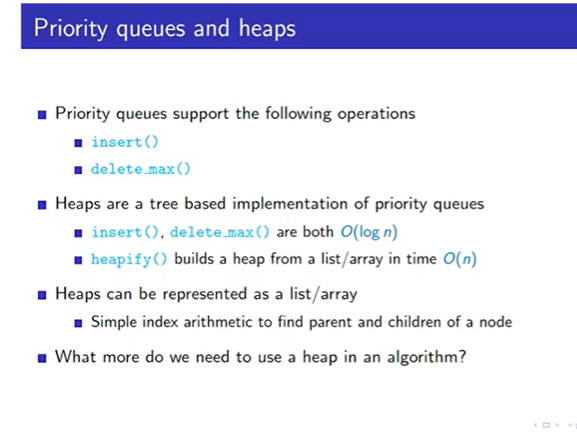

## Dijkstra's Algorithm ReWorked

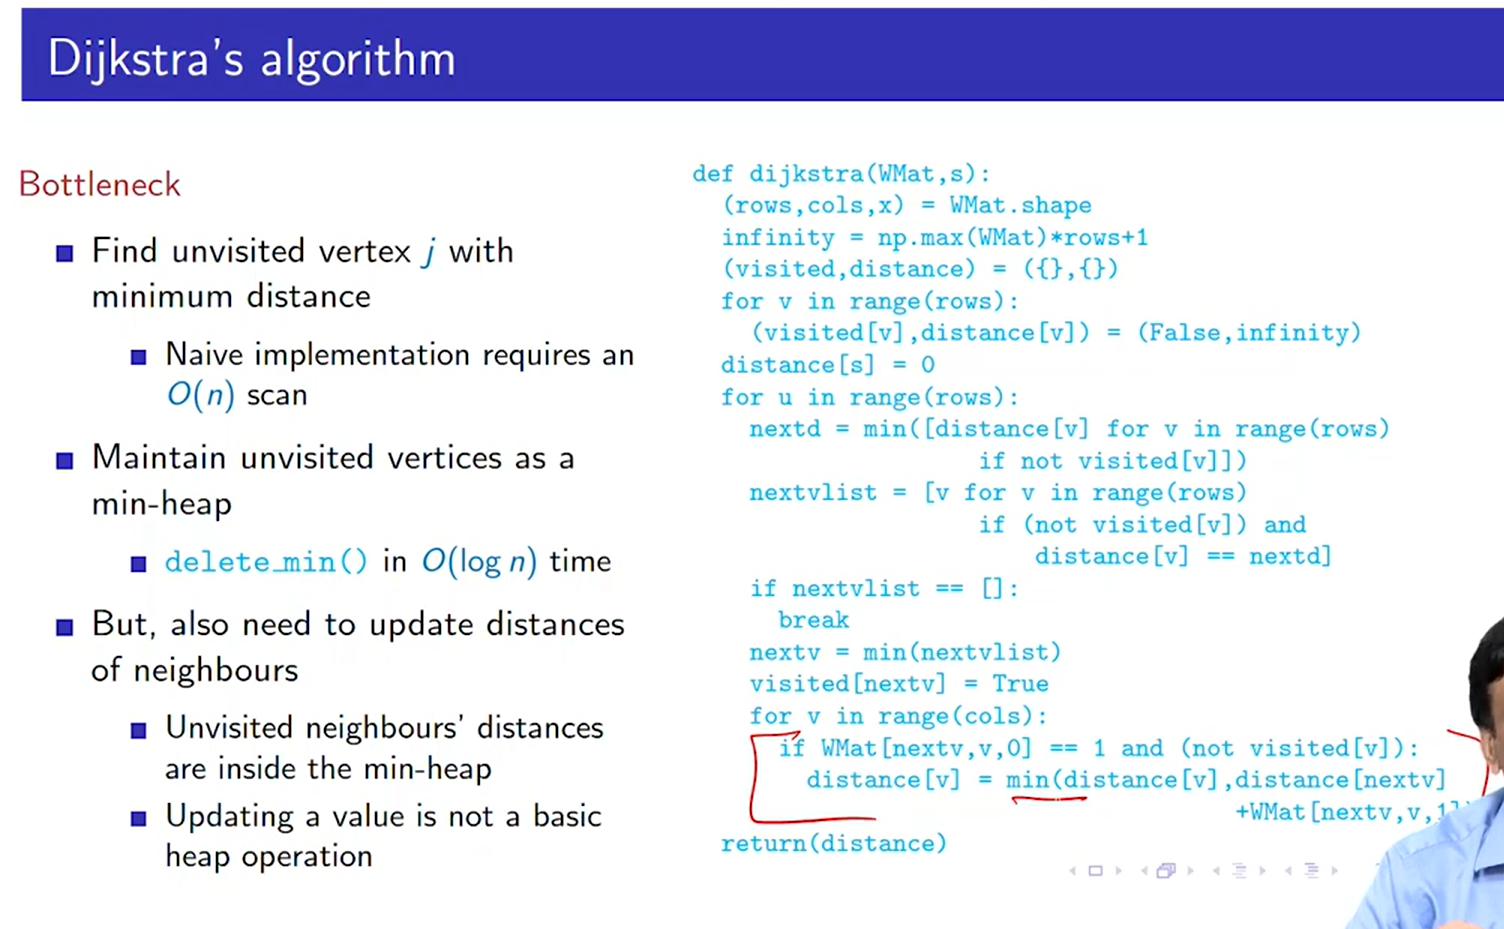

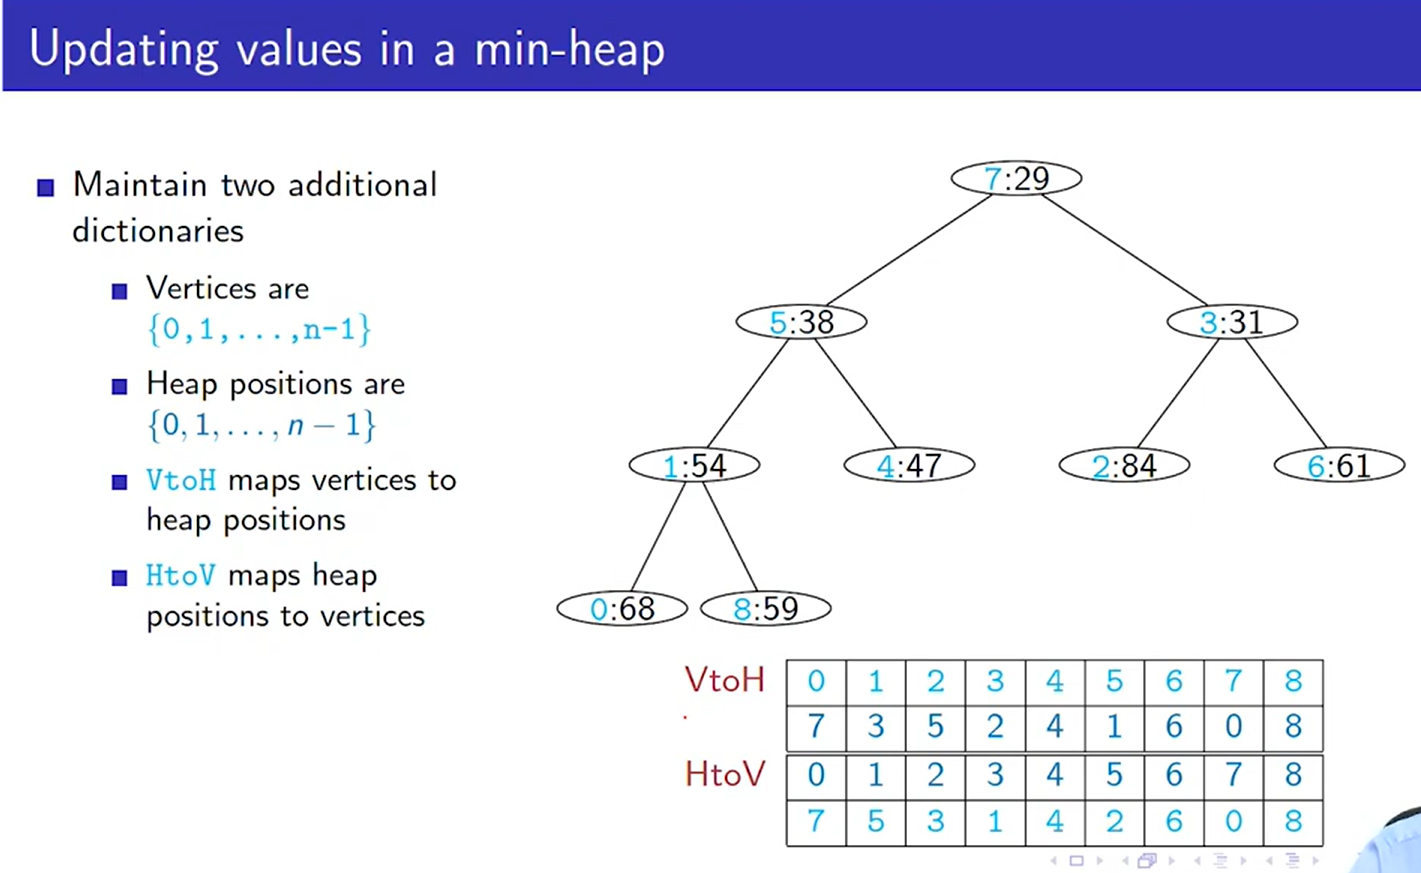

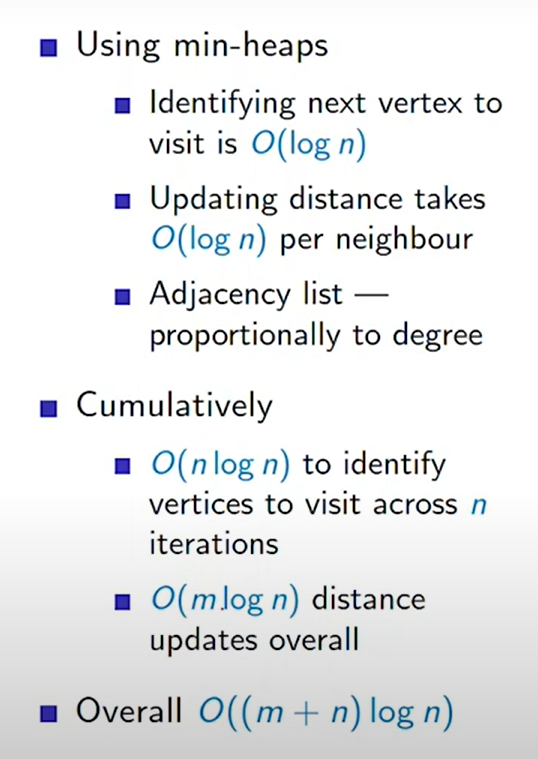

In [12]:

def min_heapify(i,size):
    lchild = 2*i + 1
    rchild = 2*i + 2
    small = i
    if lchild < size-1 and HtoV[lchild][1] < HtoV[small][1]: 
        small = lchild
    if rchild < size-1 and HtoV[rchild][1] < HtoV[small][1]: 
        small = rchild
    if small != i:
        VtoH[HtoV[small][0]] = i
        VtoH[HtoV[i][0]] = small
        (HtoV[small],HtoV[i]) = (HtoV[i], HtoV[small])
        min_heapify(small,size)

def create_minheap(size):
    for x in range((size//2)-1,-1,-1):
        min_heapify(x,size)

def minheap_update(i,size):
    if i!= 0:
        while i > 0:
            parent = (i-1)//2
            if HtoV[parent][1] >  HtoV[i][1]:
                VtoH[HtoV[parent][0]] = i
                VtoH[HtoV[i][0]] = parent
                (HtoV[parent],HtoV[i]) = (HtoV[i], HtoV[parent])
            else:
                break
            i = parent

def delete_min(hsize):
    VtoH[HtoV[0][0]] = hsize-1
    VtoH[HtoV[hsize-1][0]] = 0
    HtoV[hsize-1],HtoV[0] = HtoV[0],HtoV[hsize-1]  
    node,dist = HtoV[hsize-1]
    hsize = hsize - 1
    min_heapify(0,hsize) 
    return node,dist,hsize


HtoV, VtoH = {},{}
#global HtoV map heap index to (vertex,distance from source)
#global VtoH map vertex to heap index
def dijkstralist(WList,s):
    infinity = float('inf')
    visited = {}
    heapsize = len(WList)
    for v in WList.keys():
        VtoH[v]=v
        HtoV[v]=[v,infinity]
        visited[v] = False
    HtoV[s]= [s,0]
    create_minheap(heapsize)
    
    for u in WList.keys():
        nextd,ds,heapsize = delete_min(heapsize)             
        visited[nextd] = True        
        for v,d in WList[nextd]:
            if not visited[v]:
                HtoV[VtoH[v]][1] = min(HtoV[VtoH[v]][1],ds+d)
                minheap_update(VtoH[v],heapsize)


dedges = [(0,1,10),(0,2,80),(1,2,6),(1,4,20),(2,3,70),(4,5,50),(4,6,5),(5,6,10)]
#edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in dedges:
    WL[i].append((j,d))
s = 0
dijkstralist(WL,s)
#print(HtoV)
#print(VtoH)
for i in range(size):
    print('Shortest distance from {0} to {1} = {2}'.format(s,i,HtoV[VtoH[i]][1]))

Shortest distance from 0 to 0 = 0
Shortest distance from 0 to 1 = 10
Shortest distance from 0 to 2 = 16
Shortest distance from 0 to 3 = 86
Shortest distance from 0 to 4 = 30
Shortest distance from 0 to 5 = 80
Shortest distance from 0 to 6 = 35


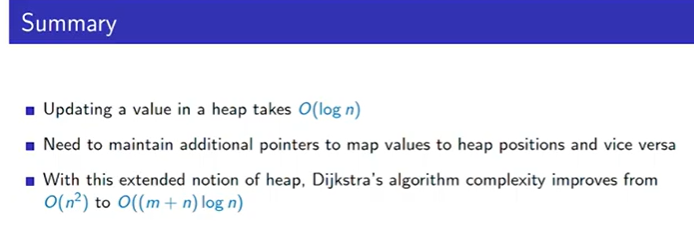

## Prim's Algorithm With Heaps

## Heap Sort

In [13]:
def max_heapify(A, size, k):
  l = 2*k + 1
  r = 2*k + 2
  largest = k

  if l < size and A[l] > A[largest]:
    largest = l
  if r < size and A[r] > A[largest]:
    largest = r
  if largest != k:
    A[k], A[largest] = A[largest], A[k]
    max_heapify(A,size,largest)

def build_max_heap(A):
  n = (len(A) // 2) - 1
  for k in range(n, -1, -1):
    max_heapify(A, len(A), k)

def heapsort(A):
  build_max_heap(A)
  n = len(A)
  for i in range(n-1, -1, -1):
    A[0], A[i] = A[i], A[0]
    max_heapify(A, i, 0)

A = [8,6,9,3,4,5,61,6666]
heapsort(A)
print(A)

[3, 4, 5, 6, 8, 9, 61, 6666]


# Search Trees

## Dynamic Sorted Data

- Sorting is useful for efficient searching,
- What if the data is changing dynamically?
  - Items are periodically inserted and deleted.
- Insert/Delete in a sorted list takes $O(n)$
- Move to a tree structure, like heaps for Priority Queues.

## Binary Search Tree [ BST ]

- For each node with value v
  - All values in the left subtree are $< v$
  - All values in the right subtree are $> v$
- No Duplicate values.

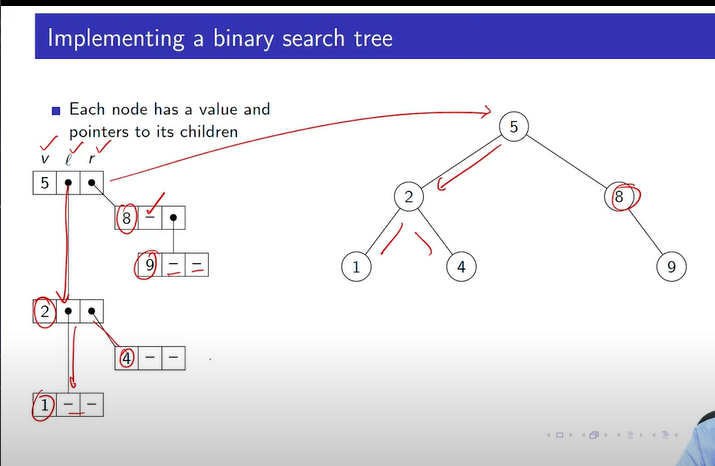

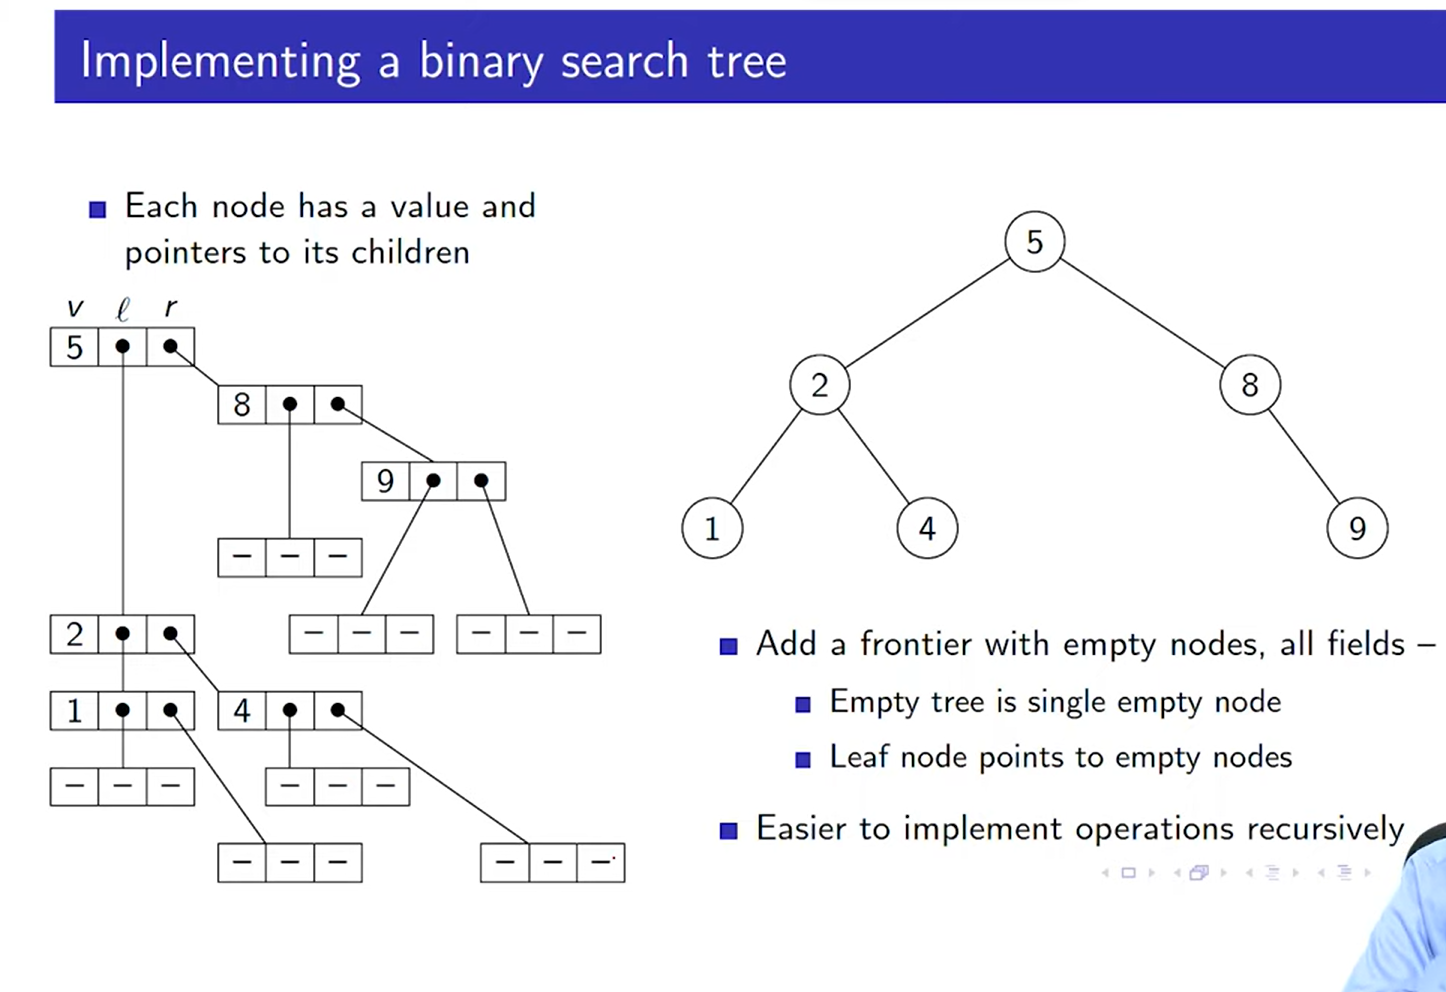

### Approach

In [14]:
class Tree:

  # Constructor
  def __init__(self, initval = None):
    self.value = initval
    if self.value:
      self.left = Tree()
      self.right = Tree()
    else:
      self.left = None
      self.right = None
    return
  
  # Empty nodes are None valued
  def isempty(self):
    return (self.value == None)
  
  def isleaf(self):
    return (self.value != None and self.left.isempty() and self.right.isempty())
  
  # Inorder Traversal
  def inorder(self):
    if self.isempty():
      return []
    else:
      return (self.left.inorder() + [self.value] + self.right.inorder())
  
  # Display Tree
  def __str__(self):
    return str(self.inorder())
  
  # Search
  def find(self, v):
    if self.isempty():
      return False
    if self.value == v:
      return True
    if v < self.value:
      return self.left.find(v)
    if v > self.value:
      return self.right.find(v)
  
  def minval(self):
    if self.left.isempty():
      return self.value
    else:
      return self.left.minval()
  
  def maxval(self):
    if self.right.isempty():
      return self.value
    else:
      return self.right.maxval()

  # Insert new element
  def insert(self, v):
    # Create new tree
    if self.isempty():
      self.value = v
      self.left = Tree()
      self.right = Tree()
    
    # Value already exists
    if self.value == v:
      return

    if v < self.value:
      self.left.insert(v)
      return
    if v > self.value:
      self.right.insert(v)
      return
    
  # Delete Data
  def delete(self, v):
    if self.isempty():
      return
    if v < self.value:
      self.left.delete(v)
      return
    if v > self.value:
      self.right.delete(v)
    if v == self.value:
      if self.isleaf():
        self.makeempty()
      elif self.left.isempty():
        self.copyright()
      elif self.right.isempty():
        self.copyleft()
      else:
        self.value = self.left.maxval()
        self.left.delete(self.left.maxval())
      return
  
  # Convert Leaf node to empty
  def makeempty(self):
    self.value = None
    self.left = None
    self.right = None
    return
  
  # Promote left child
  def copyleft(self):
    self.value = self.left.value
    self.right = self.left.right
    self.left = self.left.left
  
  # Promote right child
  def copyright(self):
    self.value = self.right.value
    self.left = self.right.left
    self.right = self.right.right
    return

In [15]:
T = Tree()
bst = [9,8,7,6,5,4,3,2,1]
k = 4
for i in bst:
    T.insert(i)
print('Element in BST are:= ',T.inorder())
print('Maximum element in BST are:= ',T.maxval())
print('Minimum element in BST are:= ',T.minval())
print(k,'is present or not = ',T.find(k))
T.delete(3)
print('Element in BST after delete 3:= ',T.inorder())

Element in BST are:=  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Maximum element in BST are:=  9
Minimum element in BST are:=  1
4 is present or not =  True
Element in BST after delete 3:=  [1, 2, 4, 5, 6, 7, 8, 9]


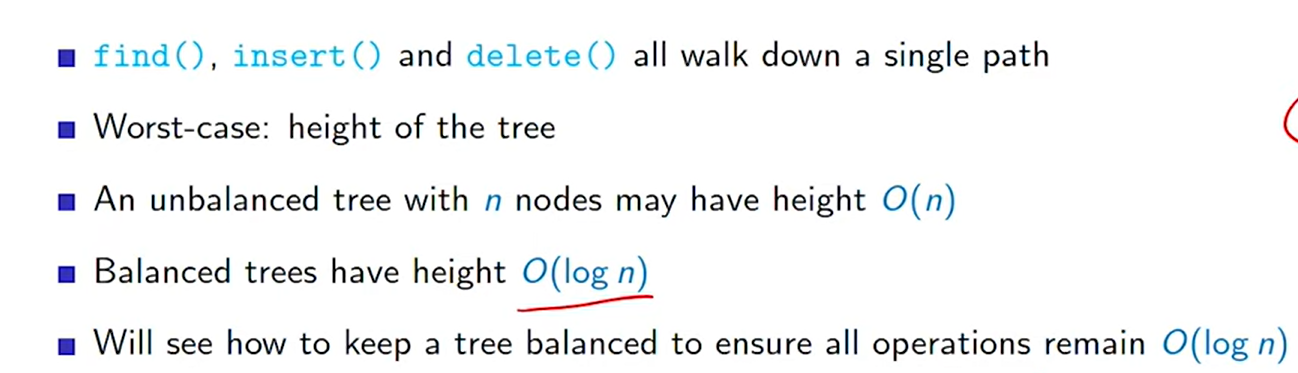